**You must run this notebook in your local machine to print your credentials**

## Question 1

In [120]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Zeeshan') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Zeeshan
Local Time: 2024-05-13 21:38:47
Computer ID: LT00145


In [130]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn

## Your code down ##
import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Part of of matplotlib for Data Viz
import matplotlib as mp
import matplotlib.pyplot as plt # data viz
from IPython.display import display # for comparison side by side
## Your code write up##

In [131]:
#Testing Libraries 
# Print the version of libraries to verify it's installed
print("Pandas version:", pd.__version__)
print("GeoPandas version:", gpd.__version__)
print("Numpy version:", np.__version__)
print("seaborn version:", sb.__version__)
print("MetplotLib version:", mp.__version__)


Pandas version: 2.1.4
GeoPandas version: 0.14.2
Numpy version: 1.24.3
seaborn version: 0.12.2
MetplotLib version: 3.7.2


In [132]:
# Read datasets I have shared in Slack Channel

df_1=pd.read_csv('data/df_1.csv')
df_2=pd.read_csv('data/df_2.csv')

In [133]:
#Checking  unique RM names in both dataframes
print('Unique RMs in df_2:', df_2['RM'].nunique())
print('Unique RMs in df_1:', df_1['RM'].nunique())


Unique RMs in df_2: 464
Unique RMs in df_1: 477


In [134]:
#identifying the non-matching RM values between the two dataframes.
# Check RM names that do not match
non_matching = set(df_2['RM'].unique()) - set(df_1['RM'].unique())
non_matching_count = len(non_matching)
print("Count of non-matching RMs:", non_matching_count)
print("List of RMs not matching:", non_matching)
df_2


Count of non-matching RMs: 43
List of RMs not matching: {'Westlock', 'Clear Hills', 'UNORG TERRITORY', 'St. Paul', 'Strathcona County', 'Opportunity', 'Yellowhead County', 'Clearwater', 'Mackenzie', 'Special Area 02', '278', 'Badlands', 'Birch Hills', 'Peace', 'Smoky River', 'Northern Sunrise', 'EAST ST PAUL', 'HILLSBURG-ROBLIN-SHELL RIVER', 'Acadia', 'Bonnyville', 'Fairview', 'Woodlands County', 'Brazeau', 'Greenview', 'Spirit River', 'Special Area 03', 'Edmonton', 'Thorhild', 'Smoky Lake', 'Lac Ste. Anne County', 'STE. ANNE', 'Saddle Hills', 'ST. CLEMENTS', 'Warner', 'Parkland County', 'ST. ANDREWS', 'Forty Mile', 'Cypress', 'Lesser Slave River', 'Taber', 'Lac La Biche', 'Two Hills', 'Saskatchewan'}


,RM
0,1
1,10
2,100
3,101
4,102
...,...
459,Wheatland
460,Willow Creek
461,Woodlands County
462,YELLOWHEAD


In [135]:
#Cleaning function : took chat gpt support
#Define the Cleaning Function
def clean_rm_column(df):
    # Strip leading and trailing spaces
    df['RM'] = df['RM'].str.strip()
    # Convert to title case for standard capitalization
    df['RM'] = df['RM'].str.title()
    # Optional: Remove any special characters, uncomment the next line if necessary
    # df['RM'] = df['RM'].str.replace('[^\w\s]', '', regex=True)
    return df


df_1 = clean_rm_column(df_1)
df_2 = clean_rm_column(df_2)

#testing df_1

#df_1.sort_values(by='RM').head(20)







In [78]:
#testing df_2
#df_2.sort_values(by='RM').head(20)

So I have 2 files / data frames : 
df_r.csv/df_r with manual correction 492 record
unique_rms.csv/unique_rms concate method 500 records

In [136]:

#This method gives 500 RMs, I have concluded 492 after mannually inspection in df_1_ready.csv file
# Concatenate the RM columns from both dataframes
all_rms = pd.concat([df_1['RM'], df_2['RM']]).reset_index(drop=True)

# Remove duplicates
unique_rms = all_rms.drop_duplicates().reset_index(drop=True)

# Optionally, sort the RM names if needed
unique_rms = unique_rms.sort_values().reset_index(drop=True)

# Save or print the result
#unique_rms.to_csv('combined_rms.csv', index=False)
#print(unique_rms.head())


In [137]:
unique_rms



0                      1
1                     10
2                    100
3                    101
4                    102
             ...        
495             Winnipeg
496            Woodlands
497     Woodlands County
498           Yellowhead
499    Yellowhead County
Name: RM, Length: 500, dtype: object

## Question 2

**Merge Shapefile(provided in Cohort 6 Repo) and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1**

In [138]:
#reading merged DF1 Fine

# Load the DataFrame
df_r = pd.read_csv('data/df_1_ready.csv')
#df_r.head()
#df_r.columns


In [140]:
df_r

,RM
0,1
1,2
2,3
3,4
4,5
...,...
487,Winnipeg
488,Woodlands
489,Woodlands County
490,Yellowhead


In [141]:
#reading shape file

# Load the Shapefile
shapefile_path = 'data/RuralMunicipality.shp'
map_data = gpd.read_file(shapefile_path)


In [142]:
#cleaning map_data
map_clean=map_data[['RMNO', 'RMNM', 'geometry']]

#checking data types for RM in both data frames :
#map_clean.info()
#df_r.info()  #both are object
map_clean.columns=['RM', 'RMNM', 'geometry'] # changing col name to match
map_clean

,RM,RMNM,geometry
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5..."
...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139..."
294,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5..."
295,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5..."
296,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285..."


plot_map : map file as per in lectures

In [143]:
#Merging plot data using lectures plot_map
plot_map=pd.merge(map_clean,df_r, on='RM', how='left')

merged_map as per chat GPT both are same


In [144]:
plot_map

,RM,RMNM,geometry
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5..."
...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139..."
294,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5..."
295,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5..."
296,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285..."


In [145]:
#merging as per Chatgpt 
# Ensure that the key column in both dataframes has the same name and format
merged_map = map_clean.merge(df_r, on='RM', how='left')


In [146]:
#checking merged data frame
merged_map


#plot_map.to_csv('data/df_r1.csv', index=False)

,RM,RMNM,geometry
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5..."
...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139..."
294,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5..."
295,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5..."
296,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285..."


In [98]:
#plot_map.tail
#plot_map['RM'].unique()

In [99]:
#df_r['RM'].unique()

Getting ready to Plot, Taking help from chat GPT

In [147]:
#making sure , RM of same type
plot_map['RM'] = plot_map['RM'].astype(str)
df_r['RM'] = df_r['RM'].astype(str)

# Perform the merge
merged_df = gpd.GeoDataFrame(plot_map.merge(df_r, on='RM', how='left'))

In [108]:
#chat gpt code not working

# Plotting
#fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
'''
merged_df.plot(column='RM', ax=ax, legend=True,
               legend_kwds={'label': "Data Value by RM",
                            'orientation': "horizontal"})
plt.show() '''



'\nmerged_df.plot(column=\'RM\', ax=ax, legend=True,\n               legend_kwds={\'label\': "Data Value by RM",\n                            \'orientation\': "horizontal"})\nplt.show() '

In [109]:
# Simple plot of the areas Chat GPT
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#merged_df.plot(ax=ax)
#plt.show()


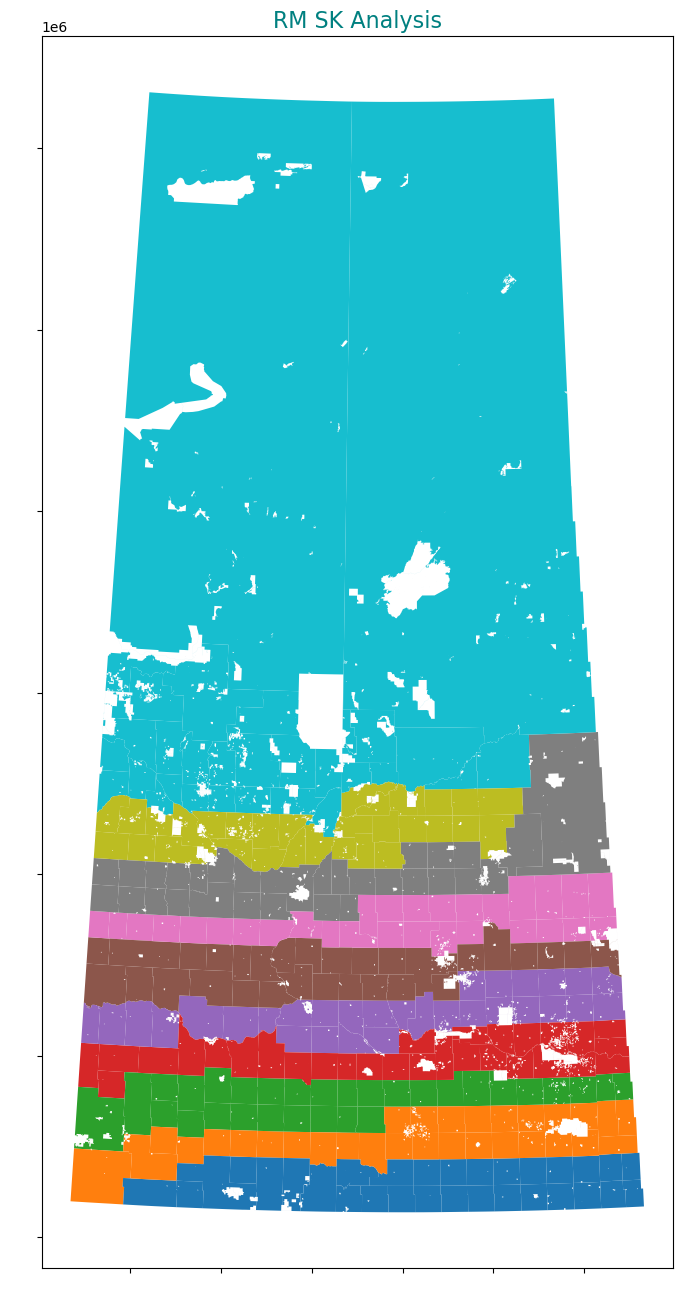

In [148]:
# Plot can be displayed in GitHub , code from lecture, we can use RMNM as well
plot_map.plot(column='RM',
             #cmap='Greens',
             legend=False,figsize=(20,16))
plt.title('RM SK Analysis', color='teal', size=16)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()